# Processo Seletivo - Avaliação Técnica


## Guilherme da Rocha Piotto

### Problema
#### 1 Qual região tem maior potencial, avaliando por meio de um índice que considera a quantidade de clientes ativos sobre a população da cidade.

In [138]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
sns.set_theme(style = "whitegrid")

### Carregando os dados.

In [139]:
dados_base = pd.read_excel("base_franquias.xlsx")
dados_demograficas = pd.read_excel('demograficas.xlsx')

In [140]:
dados_base

franquia          cidade   cadastro referencia  clientes_ativos
0       FR033  BELO HORIZONTE 2004-06-01 2019-01-01            309.0
1       FR032           BETIM 2006-05-01 2019-01-01            105.0
2       FR117         IBIRITE 2006-09-01 2019-01-01             72.0
3       FR214  RIBEIRAO PRETO 2007-01-01 2019-01-01            111.0
4       FR315      VILA VELHA 2006-09-01 2019-01-01            102.0
...       ...             ...        ...        ...              ...
5281    FR027       BEBEDOURO 2016-10-01 2021-08-01           1218.0
5282    FR196           PICOS 2021-07-01 2021-08-01            972.0
5283    FR118          IGUATU 2021-05-01 2021-08-01            717.0
5284    FR045         CACERES 2021-07-01 2021-08-01            870.0
5285    FR185     PARAUAPEBAS 2021-09-01 2021-08-01             81.0

[5286 rows x 5 columns]

In [141]:
dados_demograficas

cidade   regiao  uf      tipo  cod_ibge  soma_pop_total  \
0         ABADIA DE GOIAS   Geo CO  GO  Interior   5200050            6876   
1     ABADIA DOS DOURADOS   Geo MG  MG  Interior   3100104            6704   
2               ABADIANIA   Geo CO  GO  Interior   5200100           15757   
3                  ABAETE   Geo MG  MG  Interior   3100203           22690   
4              ABAETETUBA   Geo NO  PA  Interior   1500107          141100   
...                   ...      ...  ..       ...       ...             ...   
5560          XIQUE XIQUE   Geo NE  BA  Interior   2933604           45479   
5561               ZABELE   Geo NE  PB  Interior   2517407            2075   
5562             ZACARIAS   Geo SP  SP  Interior   3557154            2278   
5563              ZE DOCA   Geo NO  MA  Interior   2114007           50173   
5564               ZORTEA  Geo SUL  SC  Interior   4219853            2991   

      soma_pop_0a19  soma_pop_20a59  soma_pop_60mais  renda_media_familiar  
0              2379            3893              604               1667.47  
1              1867            3856              981               1624.31  
2              5255            8846             1656               1516.85  
3              6613           12797             3280               1692.19  
4             59928           71076            10096               1095.57  
...             ...             ...              ...                   ...  
5560          19371           21413             4695                859.08  
5561            721            1069              285                771.31  
5562            617            1309              352               1620.74  
5563          21622           24067             4484                902.52  
5564            973            1672              346               2078.57  

[5565 rows x 10 columns]

#### Eliminando colunas 

In [142]:
base = dados_base.drop(columns=['franquia','cadastro','referencia'])

In [143]:
base

cidade  clientes_ativos
0     BELO HORIZONTE            309.0
1              BETIM            105.0
2            IBIRITE             72.0
3     RIBEIRAO PRETO            111.0
4         VILA VELHA            102.0
...              ...              ...
5281       BEBEDOURO           1218.0
5282           PICOS            972.0
5283          IGUATU            717.0
5284         CACERES            870.0
5285     PARAUAPEBAS             81.0

[5286 rows x 2 columns]

In [144]:
demografias = dados_demograficas.drop(columns=['uf','tipo','cod_ibge','soma_pop_0a19','soma_pop_20a59',\
                                              'soma_pop_60mais','renda_media_familiar'])

In [145]:
demografias

cidade   regiao  soma_pop_total
0         ABADIA DE GOIAS   Geo CO            6876
1     ABADIA DOS DOURADOS   Geo MG            6704
2               ABADIANIA   Geo CO           15757
3                  ABAETE   Geo MG           22690
4              ABAETETUBA   Geo NO          141100
...                   ...      ...             ...
5560          XIQUE XIQUE   Geo NE           45479
5561               ZABELE   Geo NE            2075
5562             ZACARIAS   Geo SP            2278
5563              ZE DOCA   Geo NO           50173
5564               ZORTEA  Geo SUL            2991

[5565 rows x 3 columns]

In [146]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cidade           5286 non-null   object 
 1   clientes_ativos  4276 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.7+ KB


In [147]:
demografias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cidade          5565 non-null   object
 1   regiao          5565 non-null   object
 2   soma_pop_total  5565 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.6+ KB


#### Eliminando valores N/A

In [148]:
base2 = base.dropna()

In [149]:
base2


cidade  clientes_ativos
0     BELO HORIZONTE            309.0
1              BETIM            105.0
2            IBIRITE             72.0
3     RIBEIRAO PRETO            111.0
4         VILA VELHA            102.0
...              ...              ...
5281       BEBEDOURO           1218.0
5282           PICOS            972.0
5283          IGUATU            717.0
5284         CACERES            870.0
5285     PARAUAPEBAS             81.0

[4276 rows x 2 columns]

In [150]:
base2.loc[base2['cidade']=='BELO HORIZONTE']

cidade  clientes_ativos
0     BELO HORIZONTE            309.0
6     BELO HORIZONTE            222.0
59    BELO HORIZONTE             57.0
132   BELO HORIZONTE             84.0
207   BELO HORIZONTE            678.0
...              ...              ...
4832  BELO HORIZONTE            477.0
4971  BELO HORIZONTE            960.0
4999  BELO HORIZONTE           1062.0
5105  BELO HORIZONTE            378.0
5159  BELO HORIZONTE            504.0

[64 rows x 2 columns]

In [151]:
base2['cidade'].value_counts()

SAO PAULO           320
RIO DE JANEIRO      119
BELO HORIZONTE       64
SALVADOR             64
GOIANIA              48
                   ... 
PICOS                 2
TANGARA DA SERRA      2
CACERES               2
UMUARAMA              1
PARAUAPEBAS           1
Name: cidade, Length: 268, dtype: int64

In [152]:
# Agrupando as cidades e somando os clientes ativos
base_agrupada = base2.groupby('cidade').sum()

In [153]:
base_agrupada

clientes_ativos
cidade                                 
ABAETETUBA                      17994.0
ALAGOINHAS                      15765.0
ALVORADA                        11184.0
AMERICANA                        7521.0
ANANINDEUA                      25611.0
...                                 ...
VITORIA DA CONQUISTA            25533.0
VITORIA DE SANTO ANTAO           5094.0
VOLTA REDONDA                   13935.0
VOTORANTIM                       6966.0
VOTUPORANGA                      2775.0

[268 rows x 1 columns]

In [154]:
# Unindo as duas tabelas pela cidade
df_unidos = pd.merge(demografias,base_agrupada, on='cidade')

In [155]:
df_unidos

cidade     regiao  soma_pop_total  clientes_ativos
0                ABAETETUBA     Geo NO          141100          17994.0
1                ALAGOINHAS     Geo NE          141735          15765.0
2                  ALVORADA     Geo CO            8374          11184.0
3                  ALVORADA    Geo SUL          195673          11184.0
4                 AMERICANA     Geo SP          210548           7521.0
..                      ...        ...             ...              ...
282    VITORIA DA CONQUISTA     Geo NE          306688          25533.0
283  VITORIA DE SANTO ANTAO     Geo NE          129930           5094.0
284           VOLTA REDONDA  Geo RJ/ES          257341          13935.0
285              VOTORANTIM     Geo SP          108809           6966.0
286             VOTUPORANGA     Geo SP           84692           2775.0

[287 rows x 4 columns]

In [156]:
# Dividindo os valores das colunas da população total por clientes ativos
df_unidos['pop_por_clientes'] = df_unidos['soma_pop_total'] / df_unidos['clientes_ativos']

In [157]:
df_unidos

cidade     regiao  soma_pop_total  clientes_ativos  \
0                ABAETETUBA     Geo NO          141100          17994.0   
1                ALAGOINHAS     Geo NE          141735          15765.0   
2                  ALVORADA     Geo CO            8374          11184.0   
3                  ALVORADA    Geo SUL          195673          11184.0   
4                 AMERICANA     Geo SP          210548           7521.0   
..                      ...        ...             ...              ...   
282    VITORIA DA CONQUISTA     Geo NE          306688          25533.0   
283  VITORIA DE SANTO ANTAO     Geo NE          129930           5094.0   
284           VOLTA REDONDA  Geo RJ/ES          257341          13935.0   
285              VOTORANTIM     Geo SP          108809           6966.0   
286             VOTUPORANGA     Geo SP           84692           2775.0   

     pop_por_clientes  
0            7.841503  
1            8.990485  
2            0.748748  
3           17.495798  
4           27.994682  
..                ...  
282         12.011436  
283         25.506478  
284         18.467241  
285         15.620011  
286         30.519640  

[287 rows x 5 columns]

In [158]:
# Removendo a coluna cidade
df_unidos2 = df_unidos.drop(columns=['cidade'])

In [159]:
df_unidos2

regiao  soma_pop_total  clientes_ativos  pop_por_clientes
0       Geo NO          141100          17994.0          7.841503
1       Geo NE          141735          15765.0          8.990485
2       Geo CO            8374          11184.0          0.748748
3      Geo SUL          195673          11184.0         17.495798
4       Geo SP          210548           7521.0         27.994682
..         ...             ...              ...               ...
282     Geo NE          306688          25533.0         12.011436
283     Geo NE          129930           5094.0         25.506478
284  Geo RJ/ES          257341          13935.0         18.467241
285     Geo SP          108809           6966.0         15.620011
286     Geo SP           84692           2775.0         30.519640

[287 rows x 4 columns]

In [160]:
# Agrupando por região
df_agrupado = df_unidos2.groupby('regiao').sum()

In [161]:
df_agrupado

soma_pop_total  clientes_ativos  pop_por_clientes
regiao                                                      
Geo CO            8253324         397383.0        642.561719
Geo MG            8062636         265917.0       1295.514215
Geo NE           11951084         841791.0        623.382975
Geo NO           10443010         463914.0       2588.435632
Geo RJ/ES        15197478         464775.0       1029.172861
Geo SP           29926746        1070142.0       2339.134138
Geo SUL          11873699         612960.0       1245.941438

In [162]:
# Ajustando a tabela por ordem crescente
df_ordenado = df_agrupado.sort_values(by='pop_por_clientes')

In [163]:
df_ordenado

soma_pop_total  clientes_ativos  pop_por_clientes
regiao                                                      
Geo NE           11951084         841791.0        623.382975
Geo CO            8253324         397383.0        642.561719
Geo RJ/ES        15197478         464775.0       1029.172861
Geo SUL          11873699         612960.0       1245.941438
Geo MG            8062636         265917.0       1295.514215
Geo SP           29926746        1070142.0       2339.134138
Geo NO           10443010         463914.0       2588.435632

## Resultado do Projeto.

### Comforme visto na tabela acima, podemos concluir que a região que podemos mais potencial é a Região Norte seguida por São Paulo, pois temos uma população grande e ainda temos mais clientes para vender nossos produtos.


<AxesSubplot:xlabel='regiao'>

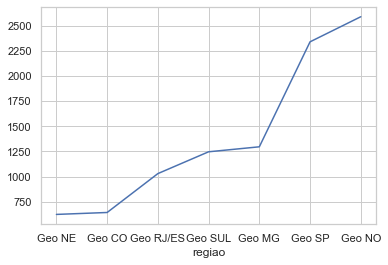

In [164]:
# Visualizando o gráfico
df_ordenado['pop_por_clientes'].plot()


## Objetivo
### Avaliar o crescimento médio anual mês a mês geral

In [165]:
# carregando os dados
crecimento = pd.read_excel("base_franquias.xlsx")

In [166]:
crecimento

franquia          cidade   cadastro referencia  clientes_ativos
0       FR033  BELO HORIZONTE 2004-06-01 2019-01-01            309.0
1       FR032           BETIM 2006-05-01 2019-01-01            105.0
2       FR117         IBIRITE 2006-09-01 2019-01-01             72.0
3       FR214  RIBEIRAO PRETO 2007-01-01 2019-01-01            111.0
4       FR315      VILA VELHA 2006-09-01 2019-01-01            102.0
...       ...             ...        ...        ...              ...
5281    FR027       BEBEDOURO 2016-10-01 2021-08-01           1218.0
5282    FR196           PICOS 2021-07-01 2021-08-01            972.0
5283    FR118          IGUATU 2021-05-01 2021-08-01            717.0
5284    FR045         CACERES 2021-07-01 2021-08-01            870.0
5285    FR185     PARAUAPEBAS 2021-09-01 2021-08-01             81.0

[5286 rows x 5 columns]

In [167]:
# Eliminando as colunas
crecimento2 = crecimento.drop(columns=['franquia','cadastro','cidade'])

In [168]:
crecimento2

referencia  clientes_ativos
0    2019-01-01            309.0
1    2019-01-01            105.0
2    2019-01-01             72.0
3    2019-01-01            111.0
4    2019-01-01            102.0
...         ...              ...
5281 2021-08-01           1218.0
5282 2021-08-01            972.0
5283 2021-08-01            717.0
5284 2021-08-01            870.0
5285 2021-08-01             81.0

[5286 rows x 2 columns]

In [169]:
# Removendo valores N\A
data_drop = crecimento2.dropna()

In [170]:
data_drop

referencia  clientes_ativos
0    2019-01-01            309.0
1    2019-01-01            105.0
2    2019-01-01             72.0
3    2019-01-01            111.0
4    2019-01-01            102.0
...         ...              ...
5281 2021-08-01           1218.0
5282 2021-08-01            972.0
5283 2021-08-01            717.0
5284 2021-08-01            870.0
5285 2021-08-01             81.0

[4276 rows x 2 columns]

In [171]:
# Agrupando por referencia
data_agrupada = data_drop.groupby('referencia').sum()

In [172]:
data_agrupada

clientes_ativos
referencia                 
2019-01-01          29268.0
2019-02-01         123096.0
2019-03-01         125745.0
2019-04-01         142077.0
2019-05-01         167700.0
2019-06-01         141705.0
2019-07-01         172812.0
2019-08-01         192744.0
2021-01-01         350430.0
2021-02-01         308415.0
2021-03-01         324429.0
2021-04-01         356565.0
2021-05-01         357648.0
2021-06-01         368118.0
2021-07-01         371445.0
2021-08-01         306063.0

In [173]:
data_agrupada.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2019-01-01 to 2021-08-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clientes_ativos  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


In [174]:
data_agrupada

clientes_ativos
referencia                 
2019-01-01          29268.0
2019-02-01         123096.0
2019-03-01         125745.0
2019-04-01         142077.0
2019-05-01         167700.0
2019-06-01         141705.0
2019-07-01         172812.0
2019-08-01         192744.0
2021-01-01         350430.0
2021-02-01         308415.0
2021-03-01         324429.0
2021-04-01         356565.0
2021-05-01         357648.0
2021-06-01         368118.0
2021-07-01         371445.0
2021-08-01         306063.0

In [175]:
# Dividindo a tabela em dois, para fazer a comparação em dois graficos
# Um grafico com o ano de 2019 e outro com 2021
df_1 = data_agrupada.iloc[:8,:]
df_2 = data_agrupada.iloc[8:,:]

In [176]:
df_1

clientes_ativos
referencia                 
2019-01-01          29268.0
2019-02-01         123096.0
2019-03-01         125745.0
2019-04-01         142077.0
2019-05-01         167700.0
2019-06-01         141705.0
2019-07-01         172812.0
2019-08-01         192744.0

In [177]:
df_2

clientes_ativos
referencia                 
2021-01-01         350430.0
2021-02-01         308415.0
2021-03-01         324429.0
2021-04-01         356565.0
2021-05-01         357648.0
2021-06-01         368118.0
2021-07-01         371445.0
2021-08-01         306063.0

<AxesSubplot:xlabel='referencia'>

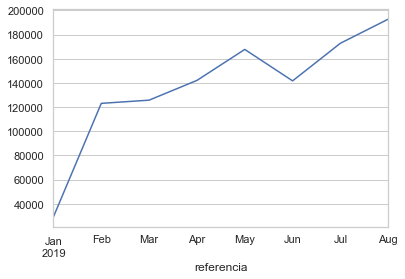

In [178]:
df_1['clientes_ativos'].plot()

<AxesSubplot:xlabel='referencia'>

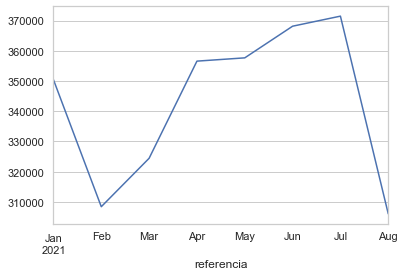

In [179]:
df_2['clientes_ativos'].plot()

## Conclusão

### Conforme observamos os gráficos acima, obtemos avaliar o crescimento médio anual mês a mês em 2019 foi crescendo, mas em maio até junho houve uma queda.

### Em 2021 tivemos uma queda no começo do ano de janeiro até fevereiro, mas depois começou a subir novamente. Depois em julho de 2021 tivemos outra queda até agosto do mesmo ano 

## Objetivo
### Avaliar o crescimento por franquia

In [180]:
# Carregando os dados
df_franquia = pd.read_excel("base_franquias.xlsx")

In [181]:
df_franquia

franquia          cidade   cadastro referencia  clientes_ativos
0       FR033  BELO HORIZONTE 2004-06-01 2019-01-01            309.0
1       FR032           BETIM 2006-05-01 2019-01-01            105.0
2       FR117         IBIRITE 2006-09-01 2019-01-01             72.0
3       FR214  RIBEIRAO PRETO 2007-01-01 2019-01-01            111.0
4       FR315      VILA VELHA 2006-09-01 2019-01-01            102.0
...       ...             ...        ...        ...              ...
5281    FR027       BEBEDOURO 2016-10-01 2021-08-01           1218.0
5282    FR196           PICOS 2021-07-01 2021-08-01            972.0
5283    FR118          IGUATU 2021-05-01 2021-08-01            717.0
5284    FR045         CACERES 2021-07-01 2021-08-01            870.0
5285    FR185     PARAUAPEBAS 2021-09-01 2021-08-01             81.0

[5286 rows x 5 columns]

In [182]:
# Excluindo as colunas
df_franquia2 = df_franquia.drop(columns=['cidade','cadastro'])

In [183]:
df_franquia2

franquia referencia  clientes_ativos
0       FR033 2019-01-01            309.0
1       FR032 2019-01-01            105.0
2       FR117 2019-01-01             72.0
3       FR214 2019-01-01            111.0
4       FR315 2019-01-01            102.0
...       ...        ...              ...
5281    FR027 2021-08-01           1218.0
5282    FR196 2021-08-01            972.0
5283    FR118 2021-08-01            717.0
5284    FR045 2021-08-01            870.0
5285    FR185 2021-08-01             81.0

[5286 rows x 3 columns]

In [184]:
# Elinimando valores N/A
df_franquia2 = df_franquia2.dropna()

In [185]:
df_franquia2.loc[df_franquia2['referencia'] == '2021-01-01']

franquia referencia  clientes_ativos
2821    FR061 2021-01-01              0.0
2822    FR032 2021-01-01           2376.0
2823    FR287 2021-01-01           1461.0
2824    FR033 2021-01-01            963.0
2825    FR124 2021-01-01           1662.0
...       ...        ...              ...
3108    FR104 2021-01-01            171.0
3109    FR145 2021-01-01            180.0
3110    FR147 2021-01-01             99.0
3111    FR198 2021-01-01            174.0
3112    FR300 2021-01-01              0.0

[292 rows x 3 columns]

In [186]:
df_franquia2.dtypes

franquia                   object
referencia         datetime64[ns]
clientes_ativos           float64
dtype: object

In [187]:
# Eliminando valores igual a 0
df_one=df_franquia2[df_franquia2["clientes_ativos"]==0].index
df_two=df_franquia2.drop(df_one)
    

In [188]:
df_two

franquia referencia  clientes_ativos
0       FR033 2019-01-01            309.0
1       FR032 2019-01-01            105.0
2       FR117 2019-01-01             72.0
3       FR214 2019-01-01            111.0
4       FR315 2019-01-01            102.0
...       ...        ...              ...
5281    FR027 2021-08-01           1218.0
5282    FR196 2021-08-01            972.0
5283    FR118 2021-08-01            717.0
5284    FR045 2021-08-01            870.0
5285    FR185 2021-08-01             81.0

[4231 rows x 3 columns]

In [189]:
df_two.loc[df_two['referencia'] == '2021-01-01']

franquia referencia  clientes_ativos
2822    FR032 2021-01-01           2376.0
2823    FR287 2021-01-01           1461.0
2824    FR033 2021-01-01            963.0
2825    FR124 2021-01-01           1662.0
2826    FR114 2021-01-01           2691.0
...       ...        ...              ...
3107    FR069 2021-01-01            138.0
3108    FR104 2021-01-01            171.0
3109    FR145 2021-01-01            180.0
3110    FR147 2021-01-01             99.0
3111    FR198 2021-01-01            174.0

[288 rows x 3 columns]

In [190]:
# Dividinfo a tabela em dois
df_cima = df_two.iloc[:1800,:]
df_baixo = df_two.iloc[1801:,:]

In [191]:
df_cima

franquia referencia  clientes_ativos
0       FR033 2019-01-01            309.0
1       FR032 2019-01-01            105.0
2       FR117 2019-01-01             72.0
3       FR214 2019-01-01            111.0
4       FR315 2019-01-01            102.0
...       ...        ...              ...
1807    FR050 2019-08-01           1785.0
1808    FR159 2019-08-01             42.0
1809    FR211 2019-08-01            432.0
1810    FR141 2019-08-01            414.0
1811    FR222 2019-08-01            258.0

[1800 rows x 3 columns]

In [192]:
df_baixo

franquia referencia  clientes_ativos
2823    FR287 2021-01-01           1461.0
2824    FR033 2021-01-01            963.0
2825    FR124 2021-01-01           1662.0
2826    FR114 2021-01-01           2691.0
2827    FR317 2021-01-01           1725.0
...       ...        ...              ...
5281    FR027 2021-08-01           1218.0
5282    FR196 2021-08-01            972.0
5283    FR118 2021-08-01            717.0
5284    FR045 2021-08-01            870.0
5285    FR185 2021-08-01             81.0

[2430 rows x 3 columns]

In [193]:
# Ajustando a coluna de Meses
df10 = df_cima.mask(df_cima == '2019-01-01', 'Jan')
df20 = df10.mask(df_cima == '2019-02-01', 'Feb')
df30 = df20.mask(df_cima == '2019-03-01', 'Mar')
df40 = df30.mask(df_cima == '2019-04-01', 'Apr')
df50 = df40.mask(df_cima == '2019-05-01', 'May')
df60 = df50.mask(df_cima == '2019-06-01', 'Jun')
df70 = df60.mask(df_cima == '2019-07-01', 'Jul')
df80 = df70.mask(df_cima == '2019-08-01', 'Aug')

In [194]:
df80

franquia referencia  clientes_ativos
0       FR033        Jan            309.0
1       FR032        Jan            105.0
2       FR117        Jan             72.0
3       FR214        Jan            111.0
4       FR315        Jan            102.0
...       ...        ...              ...
1807    FR050        Aug           1785.0
1808    FR159        Aug             42.0
1809    FR211        Aug            432.0
1810    FR141        Aug            414.0
1811    FR222        Aug            258.0

[1800 rows x 3 columns]

In [195]:
# Ajustando a coluna de Meses
df1 = df_baixo.mask(df_baixo == '2021-01-01', 'Jan')
df2 = df1.mask(df_baixo == '2021-02-01', 'Feb')
df3 = df2.mask(df_baixo == '2021-03-01', 'Mar')
df4 = df3.mask(df_baixo == '2021-04-01', 'Apr')
df5 = df4.mask(df_baixo == '2021-05-01', 'May')
df6 = df5.mask(df_baixo == '2021-06-01', 'Jun')
df7 = df6.mask(df_baixo == '2021-07-01', 'Jul')
df8 = df7.mask(df_baixo == '2021-08-01', 'Aug')

In [196]:
df8

franquia referencia  clientes_ativos
2823    FR287        Jan           1461.0
2824    FR033        Jan            963.0
2825    FR124        Jan           1662.0
2826    FR114        Jan           2691.0
2827    FR317        Jan           1725.0
...       ...        ...              ...
5281    FR027        Aug           1218.0
5282    FR196        Aug            972.0
5283    FR118        Aug            717.0
5284    FR045        Aug            870.0
5285    FR185        Aug             81.0

[2430 rows x 3 columns]

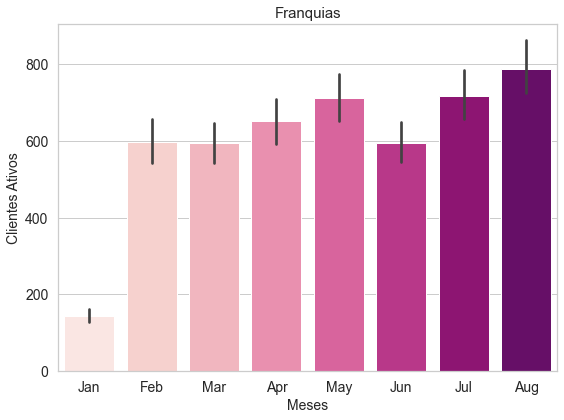

In [197]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x=df80['referencia'], y=df80['clientes_ativos'], ax=ax, data=df80,     
            palette='RdPu')
#adicionando título
ax.set_title("Franquias", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Meses', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Clientes Ativos', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();

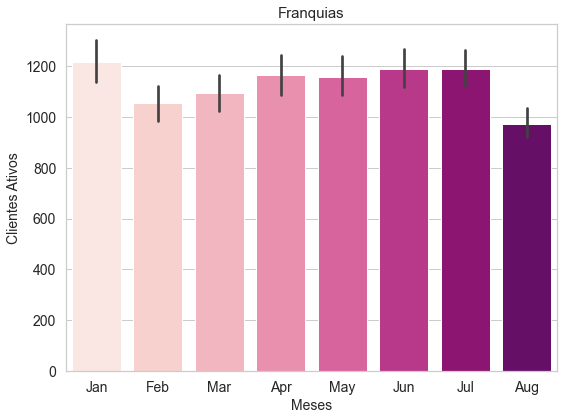

In [198]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.barplot(x=df8['referencia'], y=df8['clientes_ativos'], ax=ax, data=df8,     
            palette='RdPu')
#adicionando título
ax.set_title("Franquias", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Meses', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Clientes Ativos', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();

### Conclusão

#### Como podemos analisar nos gráficos a acima as franquias mês a mês no ano de 2021 foram obtendo mais clientes comparando os mesmos meses do ano de 2019

## Desafio

### Avalie a distância média percorrida por cada vendedor por dia

In [199]:
# Intalando biblioteca para converter latitude e longitude
!pip install geopy 

In [200]:
# Intalando biblioteca para converter latitude e longitude
!pip install haversine

In [201]:
# imports
import csv
import geopy.distance 
from haversine import haversine, Unit
from haversine import haversine_vector, Unit

In [202]:
# Carregando os dados csv.
tabela = pd.read_csv('distancia.csv', sep = ";")
display(tabela)                     


vendedor         lat          lon data_visita
0          A001  19,4653748  -70,7325173  07/09/2021
1          A001  19,5394463  -70,7877101  07/09/2021
2          A001  19,5415414  -70,7915148  07/09/2021
3          A001  19,5415272  -70,7914954  07/09/2021
4          A001  19,5467979  -70,7982352  07/09/2021
...         ...         ...          ...         ...
209151     A999  19,3665221  -70,5466114  02/11/2021
209152     A999   19,377864  -70,5409094  02/11/2021
209153     A999   19,381997  -70,5495028  02/11/2021
209154     A999  19,3816124  -70,5497501  02/11/2021
209155     A999  19,3695332  -70,5441783  02/11/2021

[209156 rows x 4 columns]

In [203]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209156 entries, 0 to 209155
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vendedor     209156 non-null  object
 1   lat          209047 non-null  object
 2   lon          209047 non-null  object
 3   data_visita  209156 non-null  object
dtypes: object(4)
memory usage: 6.4+ MB


In [204]:
tabela.describe()

vendedor         lat          lon data_visita
count    209156      209047       209047      209156
unique      183      202574       205282          78
top        A021  19,5455983  -69,3039568  05/10/2021
freq       2320           7            8        5613

In [205]:
# Trocando a virgula por ponto para fazer contas matemáticas na coluna latitude
tabela['lat'] = tabela['lat'].apply(lambda x: str(x).replace(',','.'))

In [206]:
# Trocando a virgula por ponto para fazer contas matemáticas na coluna longitude
tabela['lon'] = tabela['lon'].apply(lambda x: str(x).replace(',','.'))

In [207]:
tabela['lat']

0         19.4653748
1         19.5394463
2         19.5415414
3         19.5415272
4         19.5467979
             ...    
209151    19.3665221
209152     19.377864
209153     19.381997
209154    19.3816124
209155    19.3695332
Name: lat, Length: 209156, dtype: object

In [208]:
# Transformando a coluna latitude em float64
tabela['lat'] = tabela['lat'].astype('float64')

In [209]:
# Transformando a coluna longitude em float64
tabela['lon'] = tabela['lon'].astype('float64')

In [210]:
# Transformando a coluna data em formato de data time.
tabela['data_visita'] = pd.to_datetime(tabela['data_visita'] , format='%d/%m/%Y')

In [211]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209156 entries, 0 to 209155
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vendedor     209156 non-null  object        
 1   lat          209047 non-null  float64       
 2   lon          209047 non-null  float64       
 3   data_visita  209156 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.4+ MB


In [212]:
display(tabela) 

vendedor        lat        lon data_visita
0          A001  19.465375 -70.732517  2021-09-07
1          A001  19.539446 -70.787710  2021-09-07
2          A001  19.541541 -70.791515  2021-09-07
3          A001  19.541527 -70.791495  2021-09-07
4          A001  19.546798 -70.798235  2021-09-07
...         ...        ...        ...         ...
209151     A999  19.366522 -70.546611  2021-11-02
209152     A999  19.377864 -70.540909  2021-11-02
209153     A999  19.381997 -70.549503  2021-11-02
209154     A999  19.381612 -70.549750  2021-11-02
209155     A999  19.369533 -70.544178  2021-11-02

[209156 rows x 4 columns]

In [213]:
# Fazendo alguns cálculos de latitude e longitude.
# Exemplo da função haversine

lyon = (45.7597, 4.8422) 
paris = (48.8567, 2.3508)

haversine(lyon, paris)


392.2172595594006

In [214]:
# Separando somente o vendedor A001
tabela.loc[tabela['vendedor'] == 'A001']
                                                

vendedor        lat        lon data_visita
0        A001  19.465375 -70.732517  2021-09-07
1        A001  19.539446 -70.787710  2021-09-07
2        A001  19.541541 -70.791515  2021-09-07
3        A001  19.541527 -70.791495  2021-09-07
4        A001  19.546798 -70.798235  2021-09-07
...       ...        ...        ...         ...
1058     A001  19.631284 -70.807681  2021-11-02
1059     A001  19.612222 -70.815154  2021-11-02
1060     A001  19.495503 -70.735808  2021-11-02
1061     A001  19.475477 -70.725617  2021-11-02
1062     A001  19.465106 -70.732867  2021-11-02

[1063 rows x 4 columns]

In [215]:
p1 = (19.465375 , -70.732517)
p2 = (19.465106 , -70.732867)

In [216]:
haversine(p1, p2)

0.047340634403196684

In [217]:
# Separando a tabela em vendedor A001 e por data
tabela_vendedor1 = tabela.loc[tabela['vendedor'] == 'A001']

In [218]:
tabela_vend1_dia1 = tabela_vendedor1.loc[tabela_vendedor1['data_visita'] == '2021-09-07']

In [219]:
tabela_vend1_dia1

vendedor        lat        lon data_visita
0      A001  19.465375 -70.732517  2021-09-07
1      A001  19.539446 -70.787710  2021-09-07
2      A001  19.541541 -70.791515  2021-09-07
3      A001  19.541527 -70.791495  2021-09-07
4      A001  19.546798 -70.798235  2021-09-07
5      A001  19.551752 -70.800710  2021-09-07
6      A001  19.554827 -70.800075  2021-09-07
7      A001  19.555839 -70.799924  2021-09-07
8      A001  19.553449 -70.805527  2021-09-07
9      A001  19.549239 -70.805300  2021-09-07
10     A001  19.550000 -70.807071  2021-09-07
11     A001  19.550922 -70.810289  2021-09-07
12     A001  19.554551 -70.819210  2021-09-07
13     A001  19.557957 -70.823048  2021-09-07
14     A001  19.566386 -70.819731  2021-09-07
15     A001  19.600366 -70.820620  2021-09-07
16     A001  19.601568 -70.820116  2021-09-07
17     A001  19.602176 -70.814918  2021-09-07
18     A001  19.609834 -70.807518  2021-09-07
19     A001  19.613055 -70.806609  2021-09-07
20     A001  19.631407 -70.807662  2021-09-07
21     A001  19.631987 -70.808045  2021-09-07
22     A001  19.600368 -70.820683  2021-09-07
23     A001  19.505294 -70.754360  2021-09-07
24     A001  19.465242 -70.732726  2021-09-07

In [220]:
# transformando a coluna latitude e longitude em listas
lista_latitude = tabela_vend1_dia1['lat'].tolist()
lista_longitude = tabela_vend1_dia1['lon'].tolist()

In [221]:
lista_latitude


[19.4653748,
 19.5394463,
 19.5415414,
 19.5415272,
 19.5467979,
 19.5517525,
 19.5548265,
 19.5558386,
 19.5534488,
 19.5492387,
 19.5500003,
 19.5509216,
 19.5545513,
 19.5579571,
 19.5663859,
 19.600366,
 19.6015685,
 19.6021759,
 19.6098339,
 19.6130552,
 19.6314073,
 19.6319869,
 19.6003683,
 19.5052938,
 19.4652422]

In [222]:
lista_longitude

[-70.7325173,
 -70.7877101,
 -70.7915148,
 -70.7914954,
 -70.7982352,
 -70.8007099,
 -70.8000754,
 -70.7999237,
 -70.8055273,
 -70.8052999,
 -70.8070709,
 -70.8102888,
 -70.81921,
 -70.8230481,
 -70.8197307,
 -70.8206199,
 -70.820116,
 -70.8149183,
 -70.8075179,
 -70.8066094,
 -70.8076621,
 -70.8080451,
 -70.8206829,
 -70.7543603,
 -70.7327259]

In [223]:
p1 = (19.465375 , -70.732517)
p2 = (19.465242 , -70.732726)
haversine(p1, p2)

0.02643530336305366

In [224]:
# tentando fazer contas utilizando a função map()
# tabela_vendedor1 = list(map(haversine, lista_latitude, lista_longitude))
# haversine_vector([lista_latitude, lista_longitude], [lista_latitude, lista_longitude], Unit.KILOMETERS, comb=True)

In [225]:
# tabela_vendedor1 = list(map(haversine_vector([lista_latitude, lista_longitude], [lista_latitude, lista_longitude], Unit.KILOMETERS, comb=True))

## Conclusão

### Nessa última etapa não consegui chegar a uma conclusão sobre a média de distância percorrida por cada vendedor por dia. Pesquisei sobre latitude e longitude e como fazer cálculos utilizando a função haversine, porém não conseguir calcular a distância que cada vendedor percorreu.

## Conclusão final.

### Primeiramente agradeço por estar participando do processo seletivo. Sei que não consegui entregar um resultado esperado no último desafio, mas dei o meu melhor para tentar, continuarei estudando para poder ser um Cientista de Dados.

### Espero que nos vejamos futuramente.

#### Atenciosamente
#### Guilherme Piotto



